# Univariate Selection 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('E:\DataSets\diabetes.csv')

In [5]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [6]:
df.head()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [44]:
#x=train,y_test,x_test,y_train
#where 
# x is feature_column and y is label

In [8]:
features_cols=cols[0:8]
print(features_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


In [9]:
feat_cols = cols[0:8]
print(feat_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


In [10]:
array = df.values
X = array[:,0:8]
y = array[:,8]

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [12]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

In [13]:
import numpy as np

In [14]:
# summarize scores
np.set_printoptions(precision=3)
print(feat_cols)
print(fit.scores_)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']
[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [15]:
#0 (preg), 1 (glucose), 5 (bmi), and 7 (age).
features = fit.transform(X)
print(features[0:4,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]]


In [16]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feat_cols)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

     Specs       Score
1  glucose  213.161752
5      bmi   71.772072
7      age   46.140611


# 2. Recursive feature Elimination

In [17]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [18]:
# feature extraction
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
fit = rfe.fit(X, y)

In [19]:
print("Num Features: %d" % fit.n_features_)
print(feat_cols)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']
Selected Features: [False  True False False False  True  True False]
Feature Ranking: [4 1 3 6 5 1 1 2]


In [20]:
dfscores = pd.DataFrame(fit.ranking_)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nsmallest(3,'Score'))  #print 3 best features

      Specs  Score
1   glucose      1
5       bmi      1
6  pedigree      1


# 3.features Importance

In [58]:
pip install numpy -- upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [21]:
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(feat_cols)
print(model.feature_importances_)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']
[0.118 0.229 0.095 0.079 0.071 0.147 0.112 0.149]


In [23]:
dfscores = pd.DataFrame(model.feature_importances_)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

     Specs     Score
1  glucose  0.229182
7      age  0.149160
5      bmi  0.146576


In [24]:
import matplotlib.pyplot as plt

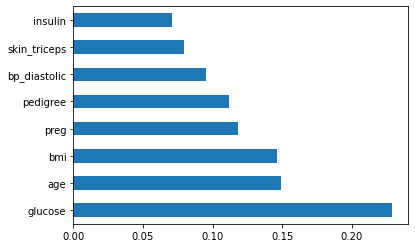

In [25]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=feat_cols)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 4.correlation Matrix with Heatmap 

In [26]:
import seaborn as sns

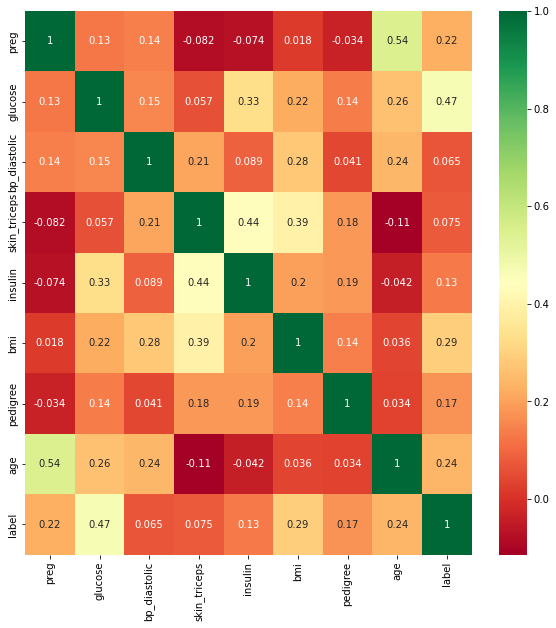

In [27]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 5. Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA

In [29]:
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]
